In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here is a comment for each line of code:

* Line 1: This line imports the yfinance package.
* Line 2: This line creates a list of DataFrames.
* Line 3: This line iterates over the tickers.
* Line 4: This line downloads the stock data for the current ticker.
* Line 5: This line adds the DataFrame to the list.
* Line 6: This line returns the list of DataFrames.

Here is a docstring for the function:

```
download_stocks(tickers: List[str]) -> List[pd.DataFrame]:

Downloads stock data from Yahoo Finance.

Args:
    tickers: A list of stock tickers.

Returns:
    A list of Pandas DataFrames, one for each stock.
```


In [2]:
# Import the yfinance package.
import yfinance as yf
import pandas as pd
from typing import List

def download_stocks(tickers: List[str]) -> List[pd.DataFrame]:
    """
    Downloads stock data from Yahoo Finance.

    Args:
        tickers: A list of stock tickers.

    Returns:
        A list of Pandas DataFrames, one for each stock.
    """

    # Create a list of DataFrames.
    df_list = []

    # Iterate over the tickers.
    for ticker in tickers:
        # Download the stock data.
        df = yf.download(ticker)

        # Add the DataFrame to the list.
        df_list.append(df)

    return df_list

In [3]:
list_of_stocks = download_stocks(['GOOGL', 'MSFT'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
GOOGL = list_of_stocks[0]
GOOGL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2023-05-15,116.110001,118.480003,116.010002,116.510002,116.510002,36266800
2023-05-16,116.489998,120.750000,116.430000,119.510002,119.510002,45035600
2023-05-17,119.610001,121.669998,118.889999,120.839996,120.839996,33323600


In [9]:
MSFT = list_of_stocks[1]
MSFT

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...
2023-05-15,309.100006,309.899994,307.589996,309.459991,308.784973,16336500
2023-05-16,309.829987,313.709991,309.829987,311.739990,311.059998,26730300
2023-05-17,312.290009,314.429993,310.739990,314.000000,314.000000,24315000


In [7]:
from typing import List, Tuple

import pandas as pd
import matplotlib.pyplot as plt

def compute_returns(df: pd.DataFrame, column: str) -> Tuple[pd.DataFrame, plt.Figure]:
    """
    Computes the time series returns of a column in a Pandas DataFrame.

    Args:
        df: A Pandas DataFrame.
        column: The name of the column to compute returns for.

    Returns:
        A tuple of the DataFrame with the returns added and a matplotlib figure of the histogram of the returns.
    """

    # Compute the returns.
    returns = df[column].pct_change()

    # Add the returns to the DataFrame.
    df["Returns"] = returns

    # Plot a histogram of the returns.
    fig, ax = plt.subplots()
    ax.hist(returns)
    ax.set_title("Histogram of Returns")
    ax.set_xlabel("Return")
    ax.set_ylabel("Count")

    return df, fig

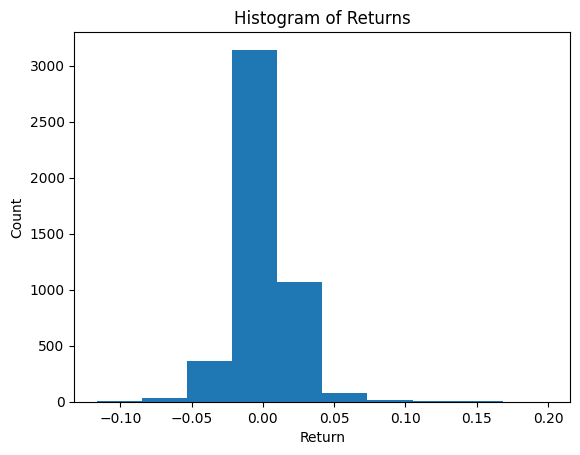

In [11]:
GOOGL_new = compute_returns(GOOGL, 'Close')

In [13]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.7 MB/s eta 0:00:00


In [19]:
import mplfinance as mpf
import pandas as pd

def plot_candlestick(df: pd.DataFrame) -> None:
    """
    This function takes a pandas DataFrame as input and plots a candlestick plot using the 'Open', 'High', 'Low', and 'Close' columns.

    Parameters:
    df (pd.DataFrame): A pandas DataFrame with 'Open', 'High', 'Low', and 'Close' columns.

    Returns:
    None
    """
    # Ensure the DataFrame is sorted by date
    df = df.sort_index()

    # Create a candlestick plot
    mpf.plot(df, type='candle', style='charles',
             title='Candlestick chart',
             ylabel='Price',
             volume=True,
             ylabel_lower='Shares\nTraded Volume',
             mav=(20, 50))  # moving averages


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


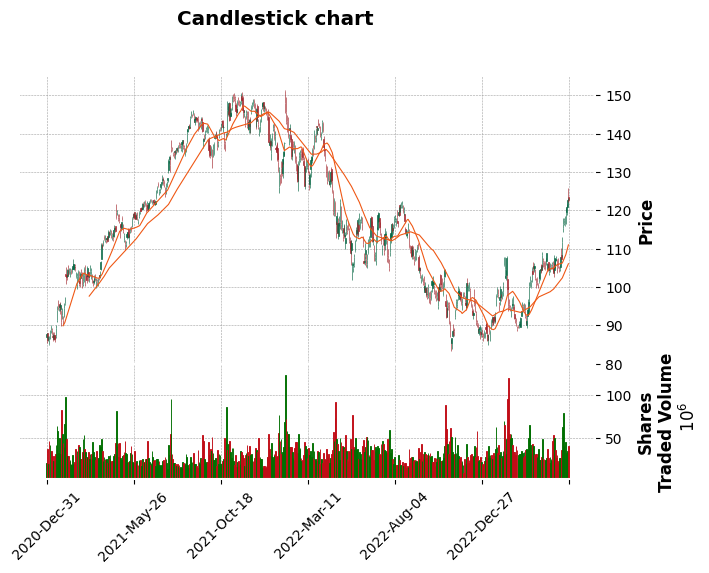

In [22]:
plot_candlestick(GOOGL.tail(600))